<a href="https://colab.research.google.com/github/unVeroz007/DIF62130_KELAS-B_25_2311532008/blob/main/Praktikum5/dimentionality_reduction_praktikum_ml_17_juni_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Mengimpor data iris, Memisahkan data (fitur) dan label (target), dan Mengecek ukuran dataset.

In [23]:
from sklearn.datasets import load_iris  # Import dataset iris dari sklearn

iris = load_iris()  # Memuat dataset iris

X = iris['data']     # Menyimpan data fitur (panjang & lebar sepal/petal) ke variabel X
y = iris['target']   # Menyimpan label spesies bunga (0=setosa, 1=versicolor, 2=virginica) ke variabel y

n_samples, n_features = X.shape  # Mengambil jumlah data (baris) dan jumlah fitur (kolom)

# Menampilkan jumlah sampel dan fitur
print(f'Number of samples: {n_samples}')
print(f'Number of features: {n_features}')

Number of samples: 150
Number of features: 4


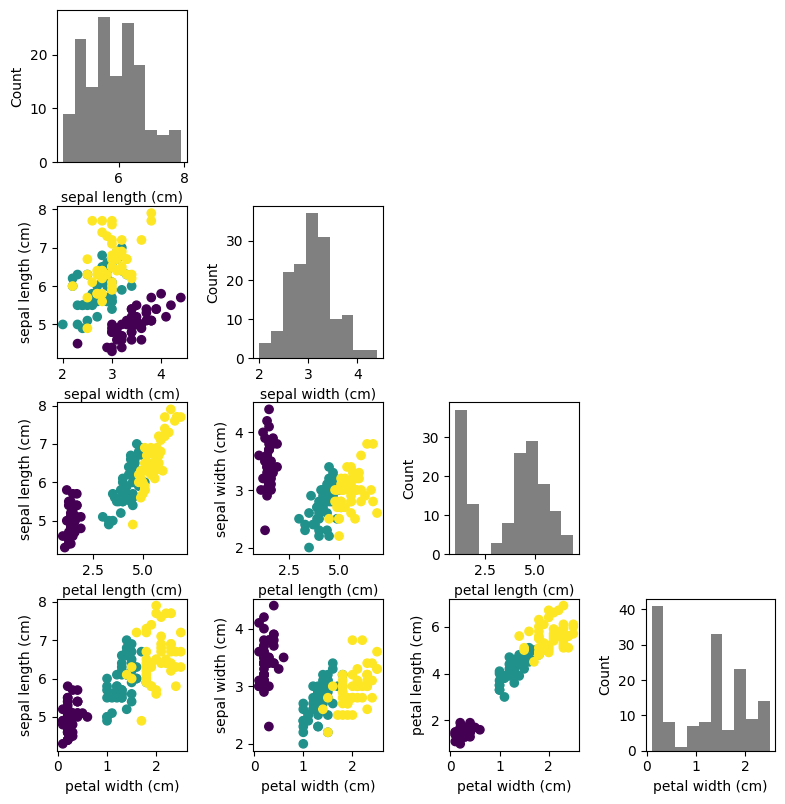

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Membuat subplot grid ukuran 4x4 (karena ada 4 fitur), dengan ukuran figure 8x8
fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize=(8, 8))
fig.tight_layout()  # Mengatur layout agar tidak saling tumpang tindih

names = iris.feature_names  # Mengambil nama-nama fitur (panjang/lebar sepal & petal)

# Loop untuk mengisi scatter plot pada bagian atas segitiga matriks (tanpa duplikasi)
for i, j in zip(*np.triu_indices(n_features, k=1)):
    ax[j, i].scatter(x[:, j], x[:, i], c=y)  # Plot scatter antara fitur j dan i, dengan warna sesuai label
    ax[j, i].set_xlabel(names[j])  # Label sumbu x sesuai fitur
    ax[j, i].set_ylabel(names[i])  # Label sumbu y sesuai fitur
    ax[i, j].set_axis_off()  # Bagian bawah segitiga dimatikan (tidak ditampilkan)

# Loop untuk mengisi histogram di diagonal (fitur dengan dirinya sendiri)
for i in range(n_features):
    ax[i, i].hist(x[:, i], color='grey')  # Histogram distribusi nilai fitur ke-i
    ax[i, i].set_ylabel('Count')  # Label sumbu y
    ax[i, i].set_xlabel(names[i])  # Label sumbu x

In [5]:
import numpy as np

def mean(x):
  return np.mean(x, axis=0) # Calculate mean for each feature

def std(x):
  return np.std(x, axis=0) # Calculate standard deviation for each feature

def Standardize(x):
  return (x - mean(x)) / std(x)

X_std = Standardize(x) # Calculate the standardized data

#2. Hitung covariance matrix

In [27]:
import numpy as np

def covariance(x):
  # Menghitung matriks kovarians dari data x
  # x.T @ x artinya mengalikan transpose(x) dengan x
  # Dibagi (n - 1) karena ini untuk kovarians sampel, bukan populasi
  return (x.T @ x) / (x.shape[0] - 1)

cov_mat = covariance(X_std)  # Menghitung matriks kovarians dari data yang sudah distandarisasi


In [7]:
display(cov_mat) # Display the covariance matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

#3 Hitung eigenvectors dan eigenvalues dari covariance matrix


In [28]:
from numpy.linalg import eig  # Import fungsi eig() untuk menghitung eigenvalues dan eigenvectors

# Melakukan dekomposisi eigen pada matriks kovarians
eig_vals, eig_vecs = eig(cov_mat)

# Menyesuaikan arah eigenvector agar elemen dengan nilai absolut terbesar bernilai positif
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)  # Cari indeks elemen terbesar (secara absolut) pada tiap eigenvector
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])  # Dapatkan tanda (+/-) dari elemen tersebut

eig_vecs = eig_vecs * signs[np.newaxis, :]  # Kalikan untuk mengatur arah vektor agar konsisten

eig_vecs = eig_vecs.T  # Transposisi agar tiap baris merepresentasikan satu eigenvector

# Menampilkan hasil eigenvalues dan eigenvectors
print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)


Eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


#langkah 4 - urutkan eigenvectors dan eigenvalues

In [29]:
# Membuat list berisi pasangan (eigenvalue, eigenvector)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i, :]) for i in range(len(eig_vals))]

# Mengurutkan pasangan berdasarkan nilai eigenvalue secara menurun (besar ke kecil)
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Menyimpan eigenvalues yang sudah diurutkan ke dalam array
eig_vals_sorted = np.array([x[0] for x in eig_pairs])

# Menyimpan eigenvectors yang sudah diurutkan ke dalam array
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

# Menampilkan hasil pasangan (eigenvalue, eigenvector) yang sudah diurutkan
print(eig_pairs)


[(np.float64(2.9380850501999918), array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (np.float64(0.920164904162487), array([0.37741762, 0.92329566, 0.02449161, 0.06694199])), (np.float64(0.14774182104494785), array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274])), (np.float64(0.020853862176462023), array([-0.26128628,  0.12350962,  0.80144925, -0.52359713]))]


#langkah 5 - Pilih principal components (PC)
pilih k eigenvektor pertama dimana k adalah jumlah dimensi subruang fitur baru

Perhatikan bahwa nilai k dapat diatur dengan cara yang lebih bijak melalui varians yang dijelaskan (explained variance) Explained variance memberi tahu kita seberapa banyak informasi (variance) yang dapat dikaitkan dengan masing-masing komponen utama (principal components).

In [10]:
# Memilih k buah eigenvector teratas sebagai komponen utama (principal components)
k = 2  # Jumlah dimensi yang diinginkan (misalnya kita ingin mereduksi ke 2 dimensi)

W = eig_vecs_sorted[:k, :]  # Ambil 2 eigenvector pertama (yang paling besar eigenvalue-nya)

print(W.shape)  # Menampilkan bentuk matriks W → seharusnya (2, jumlah_fitur_asli)


(2, 4)


Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


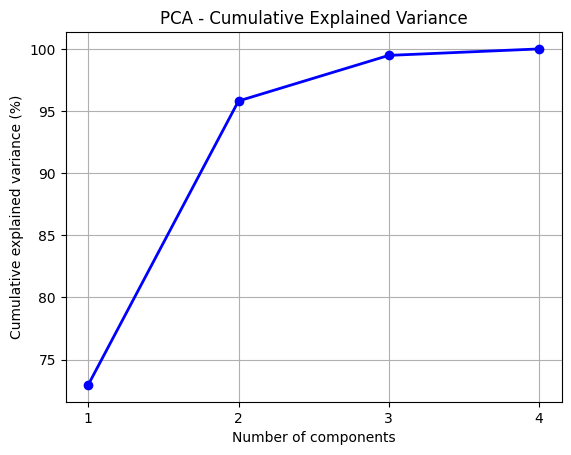

In [37]:
# Total variansi dari seluruh eigenvalues
eig_vals_total = sum(eig_vals)  # Menjumlahkan seluruh eigenvalue

# Hitung presentase variansi yang dijelaskan oleh masing-masing eigenvalue
explained_variance = [(i / eig_vals_total) * 100 for i in eig_vals_sorted]  # Dalam persen
explained_variance = np.round(explained_variance, 2)  # Dibulatkan ke 2 angka di belakang koma

# Hitung akumulasi (kumulatif) dari variansi yang dijelaskan
cum_explained_variance = np.cumsum(explained_variance)

# Tampilkan hasil presentase dan akumulasi variansi
print('Explained variance:', explained_variance)
print('Cumulative explained variance:', cum_explained_variance)

# Visualisasi: grafik garis akumulasi variansi terhadap jumlah komponen
plt.plot(np.arange(1, n_features + 1), cum_explained_variance, 'o-', color='blue', linewidth=2)
plt.xticks(np.arange(1, n_features + 1))  # Label x sesuai jumlah komponen
plt.xlabel('Number of components')  # Label sumbu x
plt.ylabel('Cumulative explained variance (%)')  # Label sumbu y
plt.title('PCA - Cumulative Explained Variance')  # Judul grafik
plt.grid(True)
plt.show()


#Langkah 6 - proyeksikan data

disini kita visualisasikan data yang akan ditranformasikan dalam ruang PCA dari dua PC pertama (PC1 dan PC2)

In [31]:
# Proyeksikan data ke ruang PCA berdimensi lebih rendah
X_proj = X_std.dot(W.T)  # Matriks data baru hasil proyeksi ke 2 komponen utama (PC1 & PC2)

# Tampilkan ukuran data hasil proyeksi dan data asli
print("Shape of projected data:", X_proj.shape)  # Output: (150, 2)
print("Shape of original data:", X.shape)        # Output: (150, 4)


Shape of projected data: (150, 2)
Shape of original data: (150, 4)


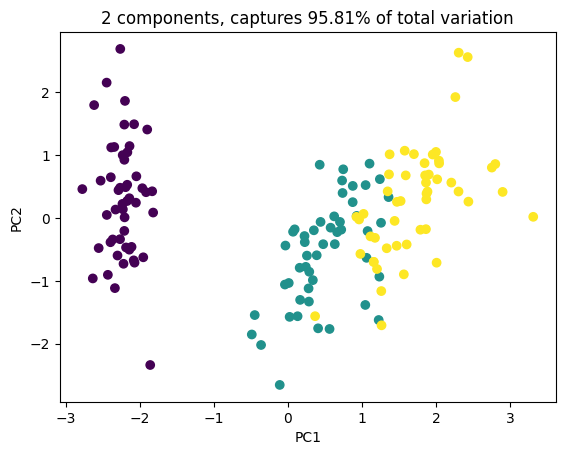

In [32]:
# Membuat scatter plot dari hasil proyeksi data ke ruang PCA (2 dimensi)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y)  # PC1 di sumbu x, PC2 di sumbu y, warna berdasarkan label kelas (y)

plt.xlabel('PC1')  # Label sumbu x = Principal Component 1
plt.ylabel('PC2')  # Label sumbu y = Principal Component 2

# Judul grafik menunjukkan bahwa 2 komponen ini menangkap sebagian besar variasi data
plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1]))

plt.show()  # Menampilkan plot


#PCA dengan sklearn

1.Import Library & Dataset

In [33]:
from sklearn.datasets import load_iris  # Import dataset Iris dari sklearn
from sklearn.preprocessing import StandardScaler  # Untuk menstandarisasi fitur
from sklearn.decomposition import PCA  # Import PCA dari sklearn
import matplotlib.pyplot as plt  # Untuk membuat visualisasi

# Memuat dataset Iris
iris = load_iris()
X = iris.data       # Ambil data fitur (panjang/lebar sepal & petal)
y = iris.target     # Ambil label target (spesies bunga)

2.  Standarisasi Data

PCA bekerja lebih baik jika data sudah distandarisasi.


In [16]:
scaler = StandardScaler()  # Membuat objek StandardScaler untuk standarisasi fitur (mean=0, std=1)
X_std = scaler.fit_transform(X)  # Menyesuaikan dan mentransformasi data X menjadi versi yang sudah distandarisasi


3. Terapkan PCA dan Tentukan Komponen Utama

In [17]:
pca = PCA(n_components=2) #PCA(n_components=2) berarti kita ingin mereduksi dimensi dari 4 → 2 dimensi.
X_pca = pca.fit_transform(X_std) #fit_transform() menyesuaikan PCA ke data dan langsung memproyeksikan data ke komponen baru.


4. Melihat Variansi yang Dijelaskan

In [18]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_) #menunjukkan proporsi variansi yang dijelaskan oleh masing-masing komponen.
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.cumsum()) #cumsum() menunjukkan akumulasi variansi yang dijelaskan. Ini penting untuk menentukan apakah 2 komponen cukup.


Explained Variance Ratio: [0.72962445 0.22850762]
Cumulative Explained Variance: [0.72962445 0.95813207]


5. PCA untuk Semua Komponen

PCA() tanpa parameter berarti kita tidak menetapkan jumlah komponen. Jadi, PCA akan menghitung semua komponen sebanyak jumlah fitur (di dataset Iris: 4 fitur → 4 komponen).

fit(X_std) akan:
    
    

1.   menghitung eigenvalues dan eigenvectors dari covariance matrix data yang sudah distandarisasi (X_std).
2.   menyimpan hasilnya dalam objek pca_full, yang bisa kamu akses nanti (seperti explained_variance_ratio_).

explained_variance_ratio_ adalah array yang menunjukkan proporsi variansi yang dijelaskan oleh masing-masing principal component.

cumsum() menghitung akumulasi variansi:


range(1, ...) memberi label sumbu-x dengan angka mulai dari 1 (komponen ke-1, ke-2, dst).

marker='o' memberi tanda bulat pada tiap titik.

linestyle='--' membuat garis putus-putus.



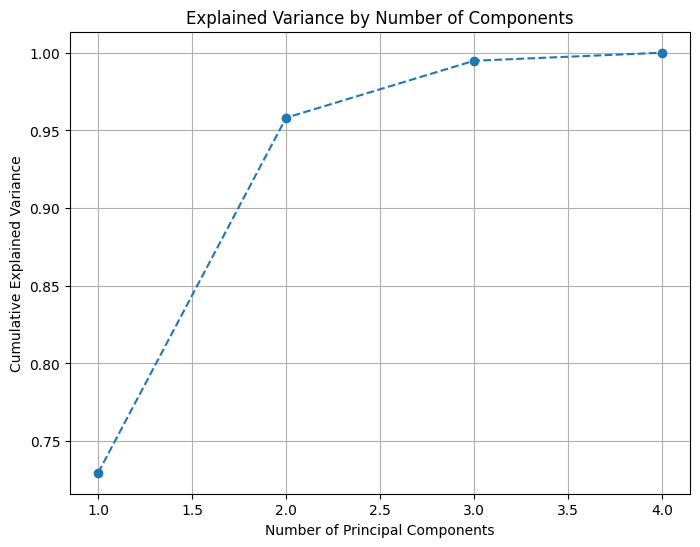

In [34]:
# Membuat objek PCA tanpa menetapkan jumlah komponen terlebih dahulu
pca_full = PCA()

# Melatih PCA menggunakan data yang sudah distandarisasi
pca_full.fit(X_std)

# Membuat figure baru untuk visualisasi
plt.figure(figsize=(8, 6))

# Plot garis akumulasi variansi yang dijelaskan oleh jumlah komponen utama
plt.plot(
    range(1, len(pca_full.explained_variance_ratio_) + 1),  # 1 sampai jumlah fitur (4)
    pca_full.explained_variance_ratio_.cumsum(),  # Akumulasi variansi yang dijelaskan
    marker='o',
    linestyle='--'
)

# Label dan judul plot
plt.xlabel('Number of Principal Components')  # Sumbu x: jumlah komponen
plt.ylabel('Cumulative Explained Variance')  # Sumbu y: akumulasi variansi (%)
plt.title('Explained Variance by Number of Components')  # Judul grafik
plt.grid(True)  # Tambahkan grid agar lebih mudah dibaca
plt.show()  # Tampilkan plot


6. Visualisasi Hasil Proyeksi PCA

Menampilkan visualisasi hasil reduksi dimensi dari 4D → 2D.

Titik-titik diwarnai berdasarkan label y.

Sumbu adalah PC1 dan PC2.

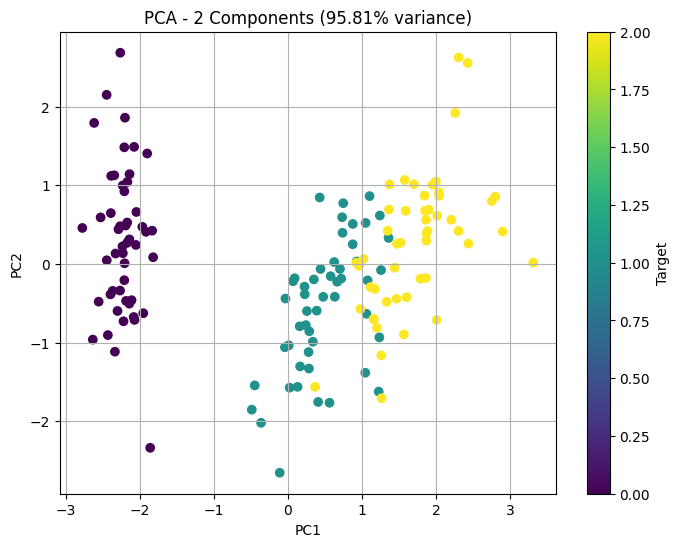

In [35]:
plt.figure(figsize=(8, 6))  # Membuat canvas figure dengan ukuran 8x6 inci

# Scatter plot hasil reduksi dimensi PCA ke 2 komponen utama
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)  # PC1 di sumbu x, PC2 di sumbu y, warna sesuai target kelas (y)

plt.xlabel('PC1')  # Label sumbu x: Principal Component 1
plt.ylabel('PC2')  # Label sumbu y: Principal Component 2

# Judul grafik menampilkan total persentase variansi dari 2 komponen utama
plt.title(f'PCA - 2 Components ({round(sum(pca.explained_variance_ratio_)*100, 2)}% variance)')

plt.colorbar(label='Target')  # Tambahkan colorbar untuk menunjukkan label target (kelas)
plt.grid(True)  # Tambahkan grid agar grafik lebih mudah dibaca
plt.show()  # Tampilkan plot
